## infromation about the data

WNS Analytics Wizard 2018
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion

### evaluation metric is F1 score

## 1 == promoted
## 0 == not promoted

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load datasets to the notebook
train = pd.read_csv('p_train.csv')
test = pd.read_csv('p_test.csv')

In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
# concate both dataset for model preparation
df = pd.concat([train,test],ignore_index=True)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [ ]:
df.shape

(78298, 14)

there are 78298 rows and 14 columns are there

# checking sample submission score

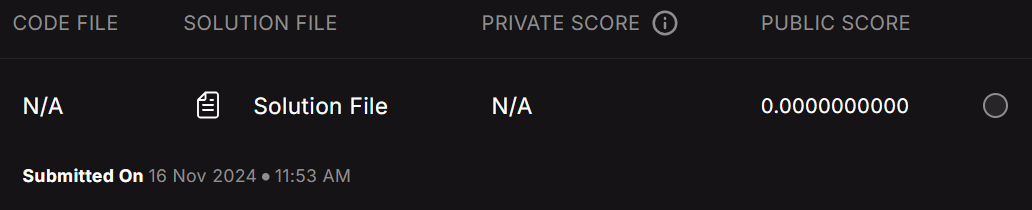

the sample submission got score 0 now lets make a good model to get good score

In [ ]:
# checking information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


we can see there are some missing or null values in education and previous year ratting

In [ ]:
# finding the missing value count
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,3443
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,5936
length_of_service,0


# there are 3443 missing values in education and 5936 missing values in previous year ratting.

In [ ]:
# finging missing value percentage
df.isnull().sum()/df.shape[0]*100

,0
employee_id,0.000000
department,0.000000
region,0.000000
education,4.397303
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.581292
length_of_service,0.000000


In [ ]:
# checking for numerical festures
df.select_dtypes(include='number').columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

'employee_id',

'no_of_trainings',


'age',

'previous_year_rating',

'length_of_service',

 'KPIs_met >80%',

 'awards_won?',

'avg_training_score',

'is_promoted'

In [ ]:
# checking for categorical features
df.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

'department',

'region',

'education',

'gender',

'recruitment_channel'

In [ ]:
# checking for duplicated values
df.duplicated().sum()

0

In [ ]:
# cehcking for unique values
df.nunique()

,0
employee_id,78298
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


each columns has different unique values

In [ ]:
# check the statistical distribution of the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.5,58723.75,78298.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.00,1.0,1.00,10.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.0,39.00,60.0
previous_year_rating,72362.0,3.332219,1.260982,1.0,3.00,3.0,4.00,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.00,5.0,7.00,37.0
KPIs_met >80%,78298.0,0.354032,0.478222,0.0,0.00,0.0,1.00,1.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.00,0.0,0.00,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.0,76.00,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.00,1.0


In [ ]:
# checking for correlation
num_col = df.select_dtypes(include=['number'])
num_col.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005216,0.000586,0.001372,0.004420,0.000127,0.005943,-0.003930,0.001206
no_of_trainings,-0.005216,1.000000,-0.082536,-0.058439,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.082536,1.000000,0.009137,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001372,-0.058439,0.009137,1.000000,0.001063,0.350921,0.027636,0.071813,0.159320
length_of_service,0.004420,-0.058403,0.653339,0.001063,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.350921,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,-0.004818,-0.007357,0.027636,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,0.044180,-0.044592,0.071813,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

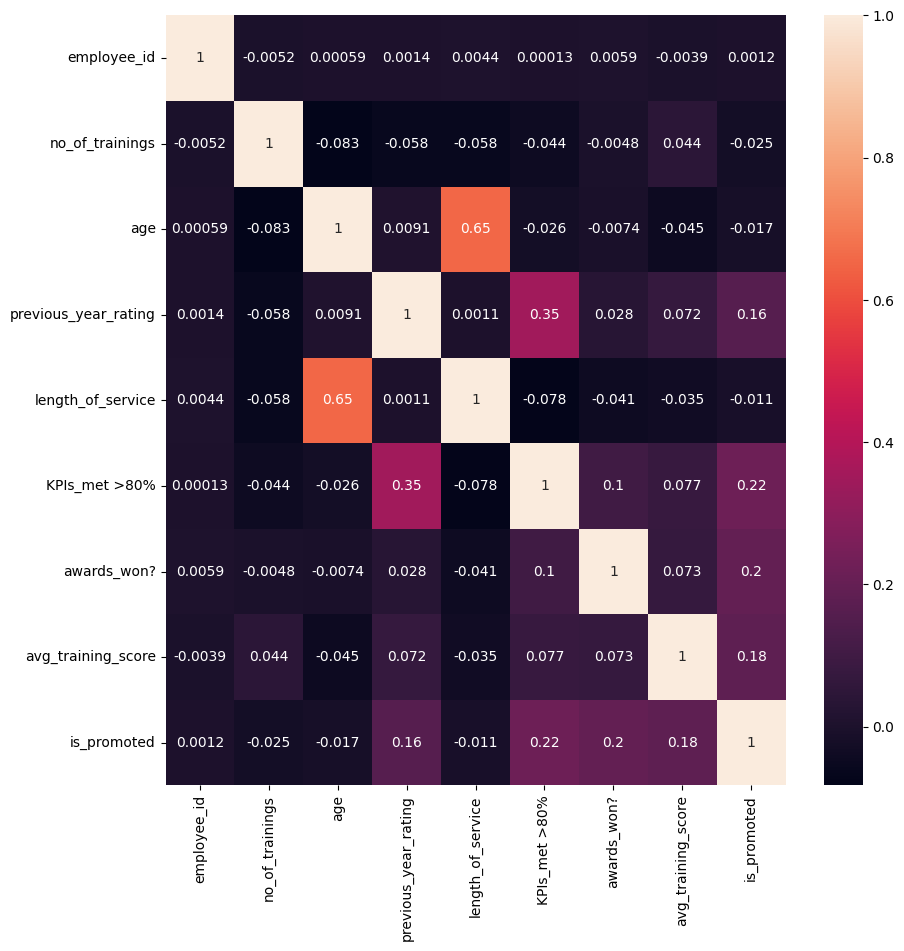

In [ ]:
# form heatmap checking correlation visually
plt.figure(figsize=(10,10))
sns.heatmap(num_col.corr(),annot=True)

# 65% age and length of service are positively corelated

# exploratory data analysis

# univariate analysis

lets see the distribution od data in the each numerical column

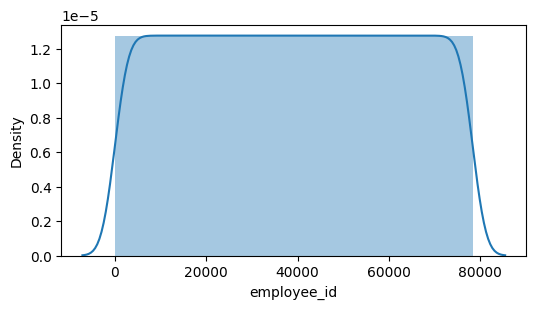

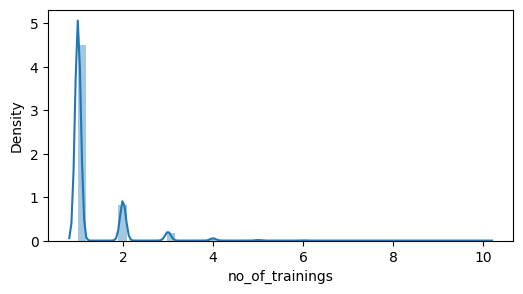

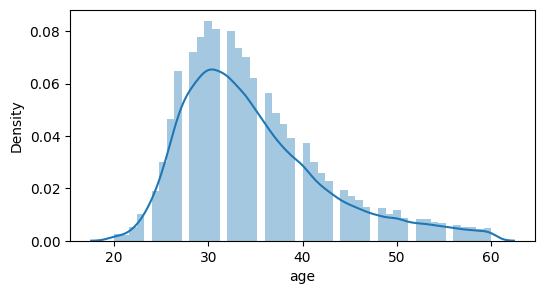

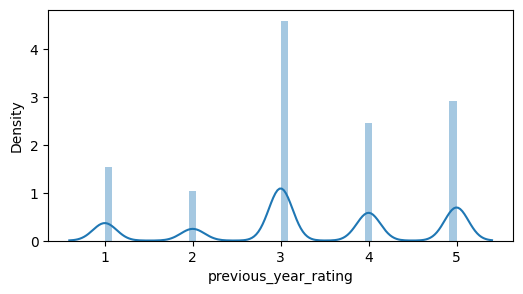

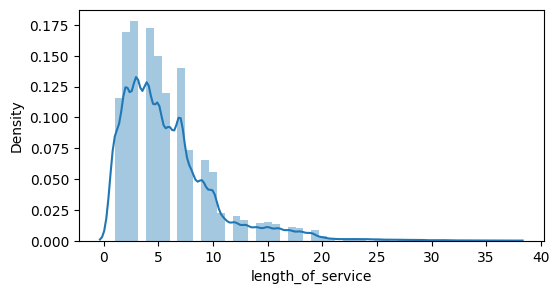

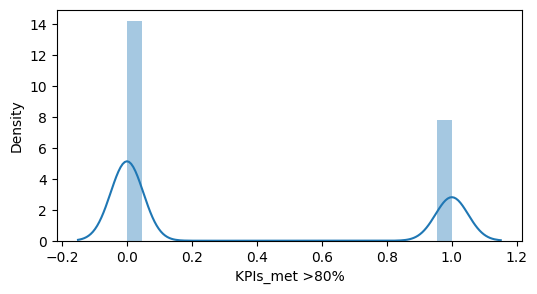

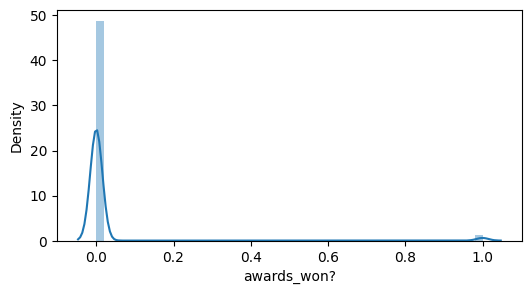

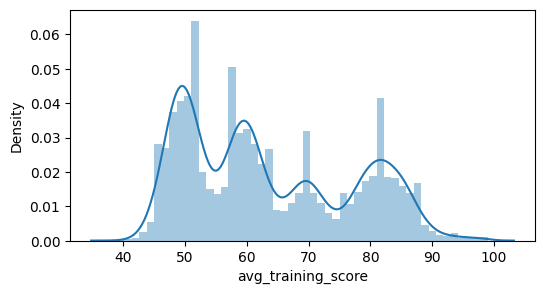

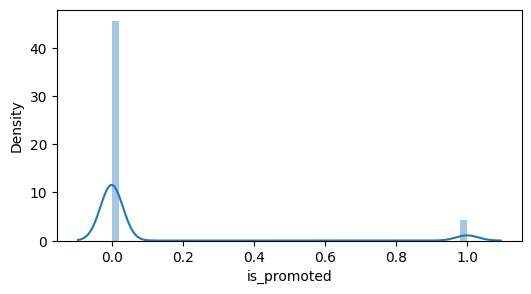

In [ ]:
for features in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,3))
    sns.distplot(df[features])
    plt.show()
    plt.show()

# OBSERVATIONS:
1) age is  having slight skewness in right side by using some scalling techniques and we make it fully normally distributed

2) in previous year ratting ratting of 3 is more compared to remaining

3)Length of service has right side skewness

4)The key performance indicator has scoring maximum less than 80% so 0 are more then one

5)Award won also having right sid skewness

6) having to apply scalling for avg_trainning_score

7) by seeing the promoted feature having imbalanced data where 0 are more then 1

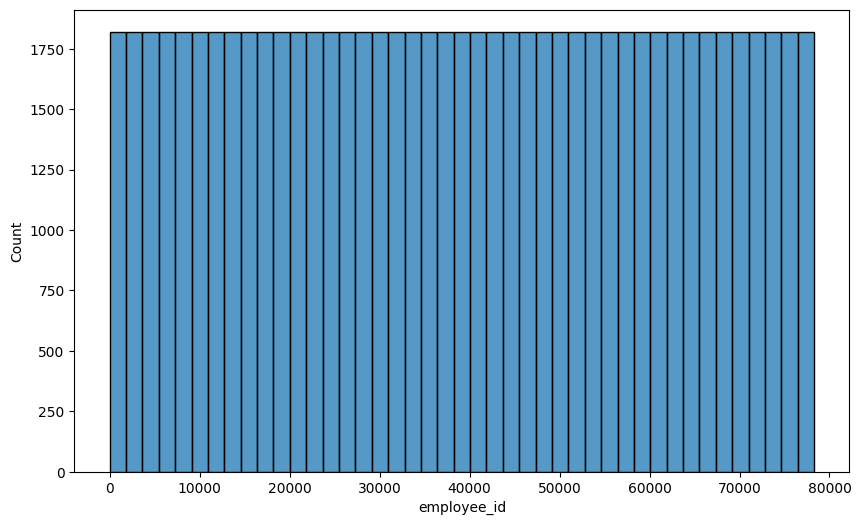

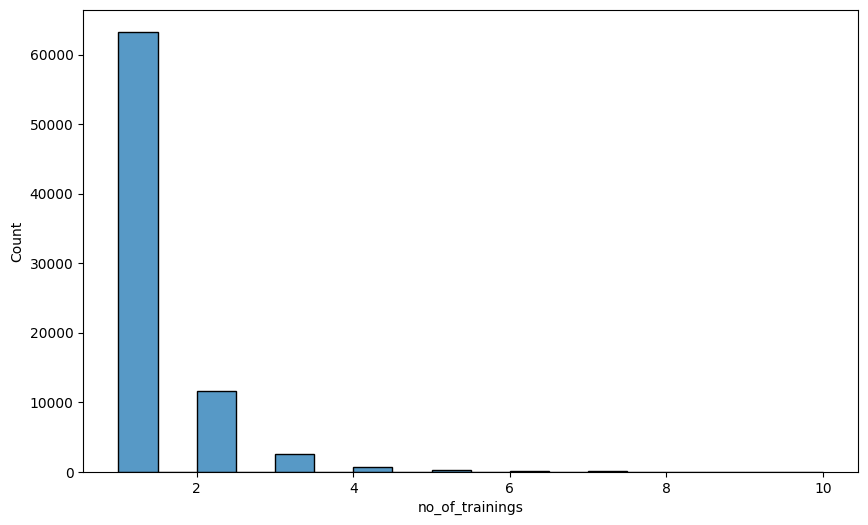

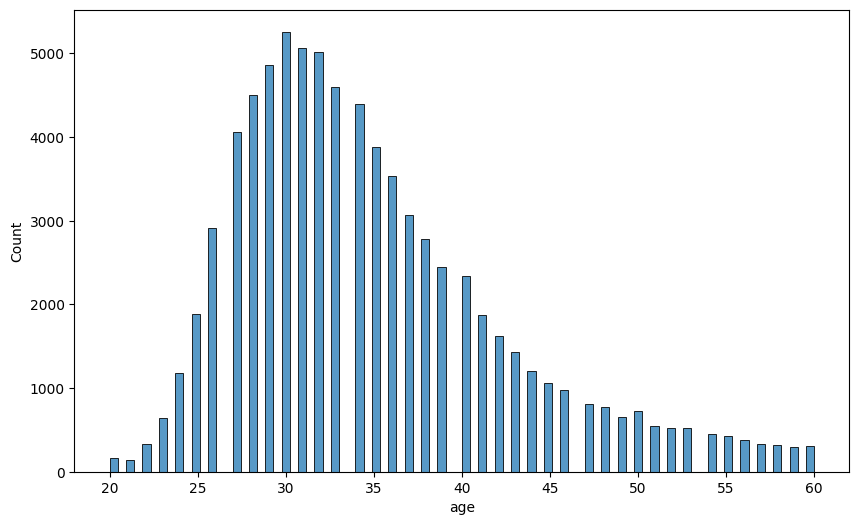

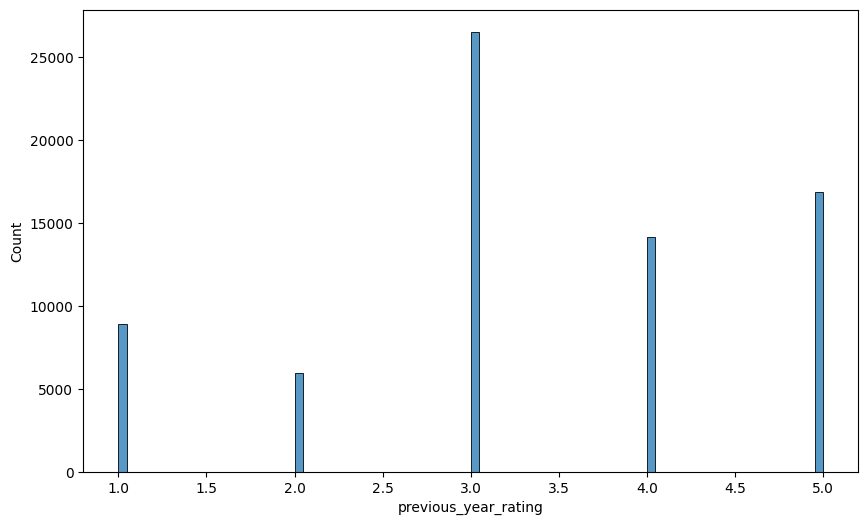

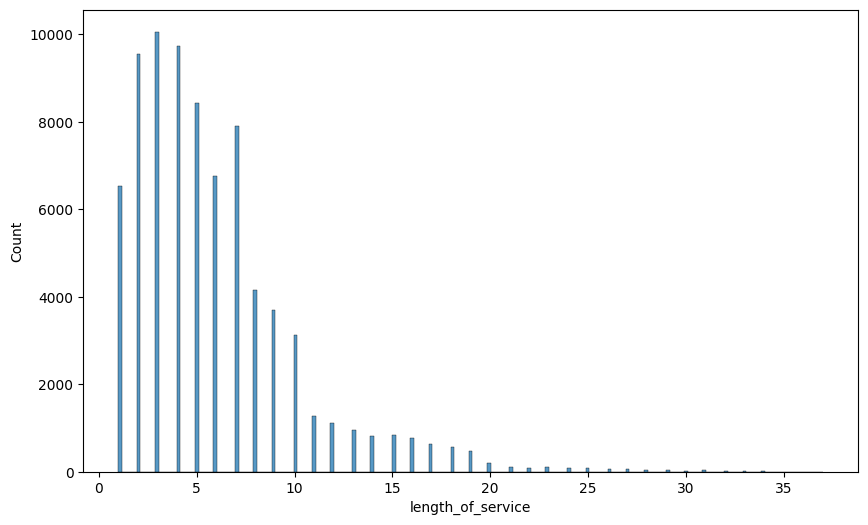

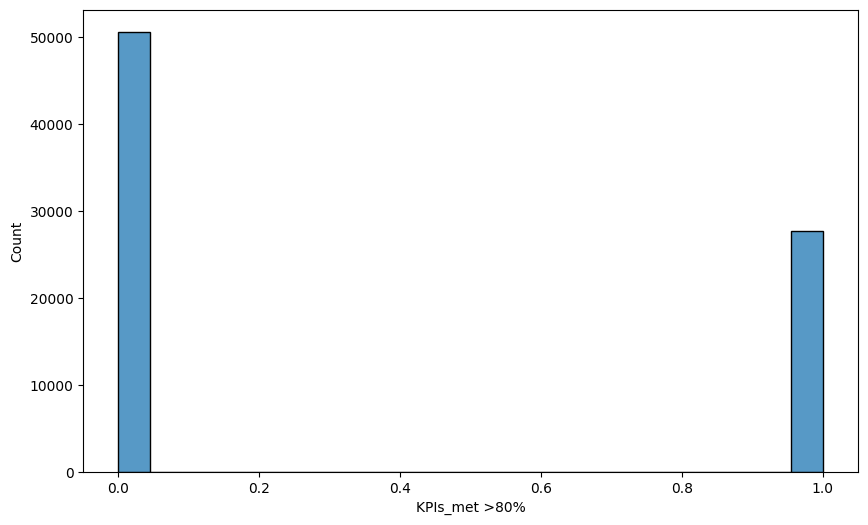

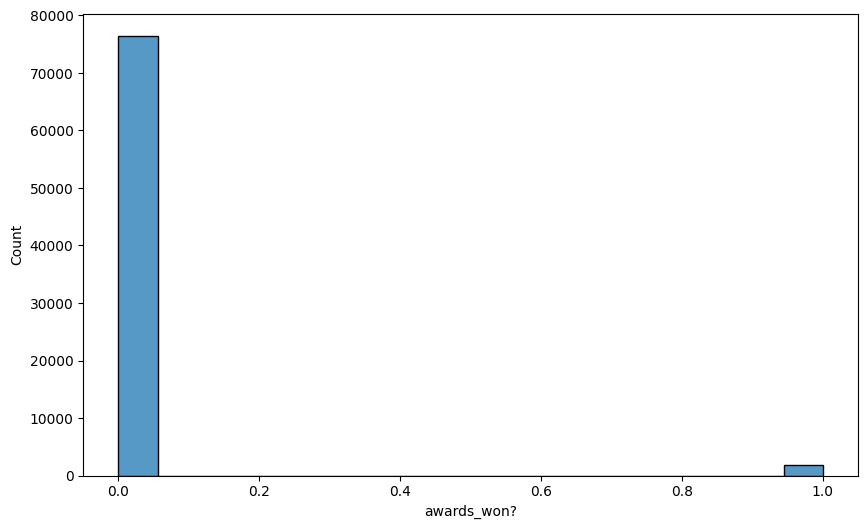

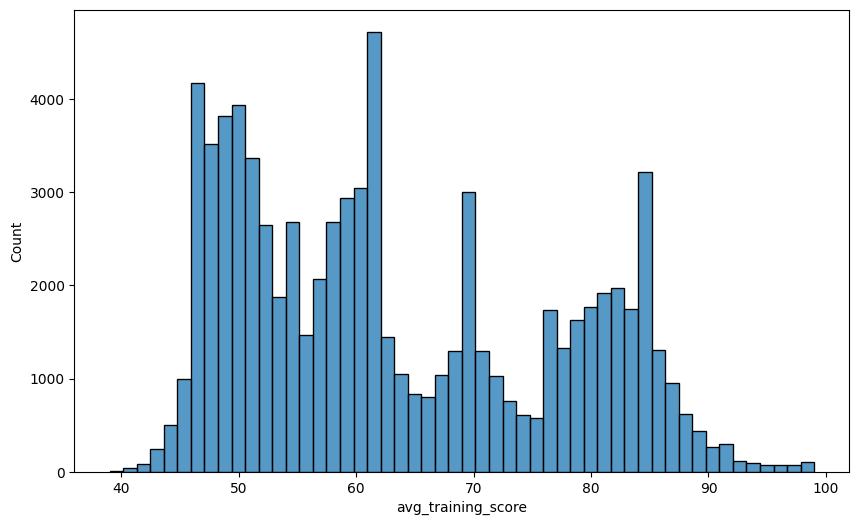

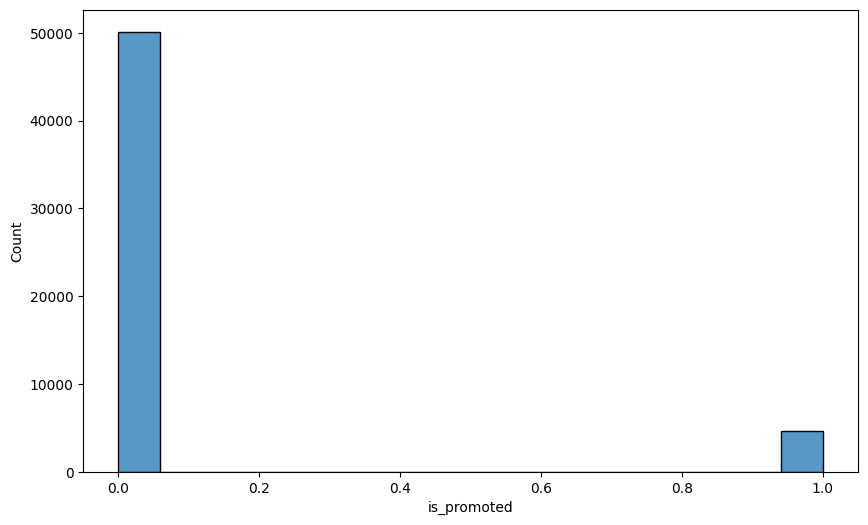

In [ ]:
for features in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[features])
    plt.show()
    plt.show()

# lets  check some key insights of categorical features

In [ ]:
df.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
dep_name=df['department'].value_counts().index

In [ ]:
dep_val = df['department'].value_counts().values

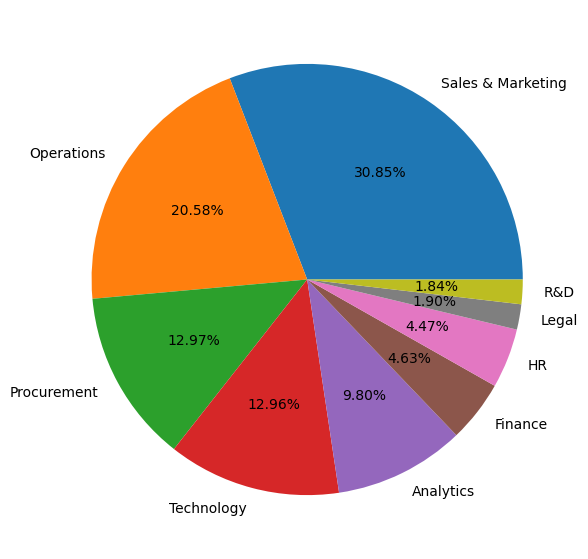

In [ ]:
# lets plot pie chart
plt.figure(figsize=(10,7))
plt.pie(dep_val,labels=dep_name,autopct='%1.2f%%')
plt.show()

# observation:

1) sales& marketing &operations & procurement employess are high compared to other departments

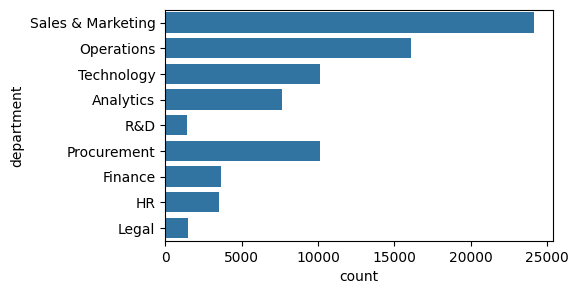

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(df['department'])
plt.show()

In [ ]:
# lets check with region
df['region'].value_counts()

,count
region,
region_2,17642
region_22,9167
region_7,6825
region_15,3938
region_13,3815
region_26,3271
region_31,2779
region_4,2478
region_27,2369


In [ ]:
print(df.groupby('region')['is_promoted'].mean())

region
region_1     0.095082
region_10    0.078704
region_11    0.056274
region_12    0.066000
region_13    0.086858
region_14    0.074970
region_15    0.079060
region_16    0.069625
region_17    0.136935
region_18    0.032258
region_19    0.060641
region_2     0.080126
region_20    0.057647
region_21    0.043796
region_22    0.114188
region_23    0.116596
region_24    0.035433
region_25    0.125763
region_26    0.063274
region_27    0.078963
region_28    0.116844
region_29    0.043260
region_3     0.106936
region_30    0.089802
region_31    0.056848
region_32    0.042328
region_33    0.037175
region_34    0.027397
region_4     0.144451
region_5     0.045692
region_6     0.046377
region_7     0.106546
region_8     0.080916
region_9     0.019048
Name: is_promoted, dtype: float64


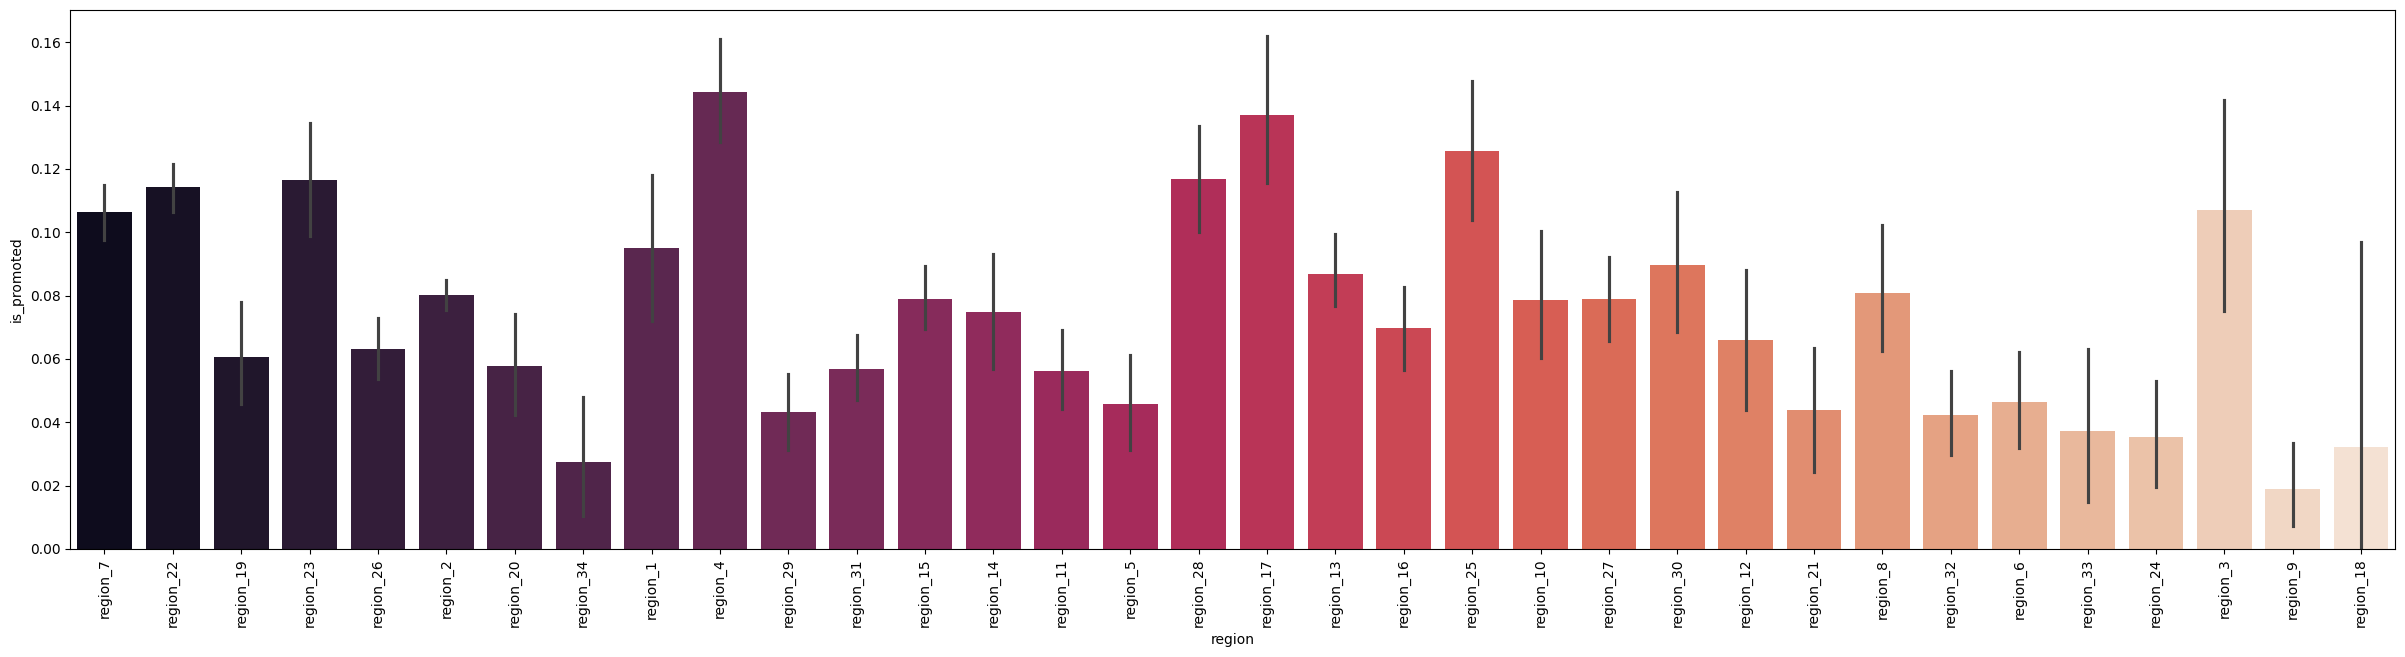

In [ ]:
# lets plot bargraph between region and is_promted features
plt.figure(figsize=(30,7))
sns.barplot(x='region',y='is_promoted',data=df,palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# make a copy of original data
df_1=df.copy()

In [ ]:
df_1.drop('region',axis=1,inplace=True)

In [ ]:
df_1.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
df_1.select_dtypes(include='object').columns

Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
# let check for education
df_1['education'].value_counts()

,count
education,
Bachelor's,52247
Master's & above,21429
Below Secondary,1179


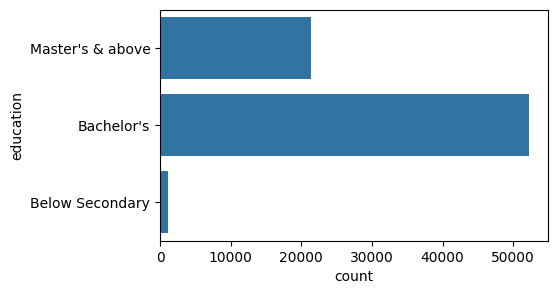

In [ ]:
# plot count plot for education
plt.figure(figsize=(5,3))
sns.countplot(df_1['education'])
plt.show()

# bachelor's more in the data

In [ ]:
# lets check for gender
df_1['gender'].value_counts()

,count
gender,
m,55092
f,23206


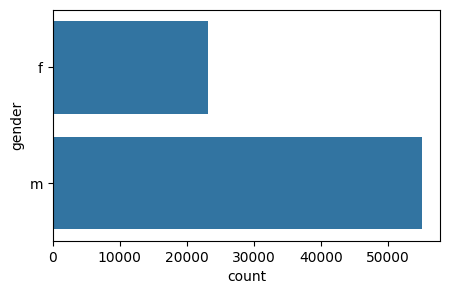

In [ ]:
# plot count plot for gender
plt.figure(figsize=(5,3))
sns.countplot(df_1['gender'])
plt.show()

more then 50000 are males  in the data


In [ ]:
# lets check for recruitment_channel
df_1['recruitment_channel'].value_counts()

,count
recruitment_channel,
other,43524
sourcing,33181
referred,1593


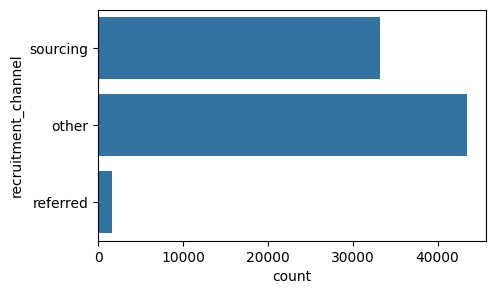

In [ ]:
#plot a count plot for recruitment channel
plt.figure(figsize=(5,3))
sns.countplot(df_1['recruitment_channel'])
plt.show()

## Bivariate Analysis

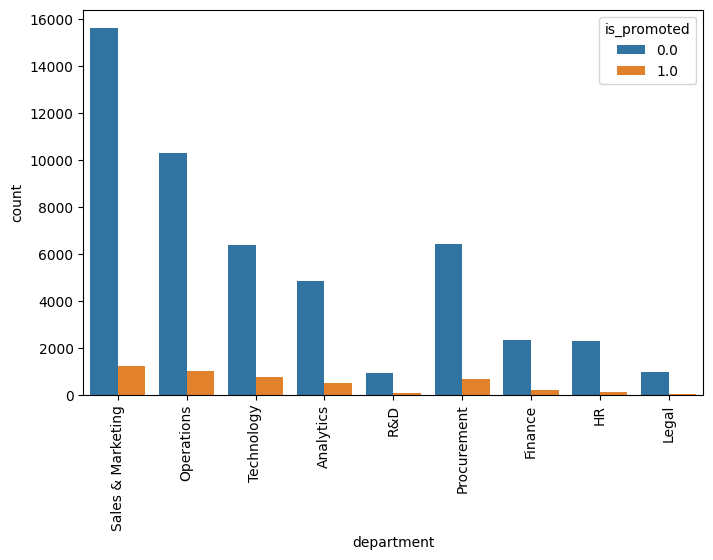

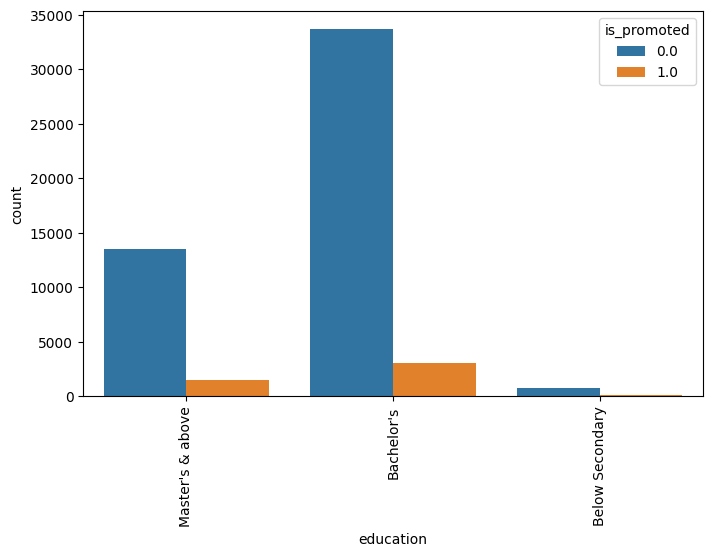

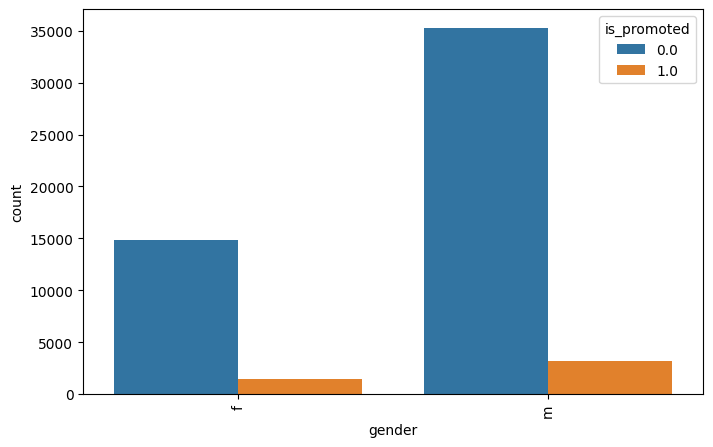

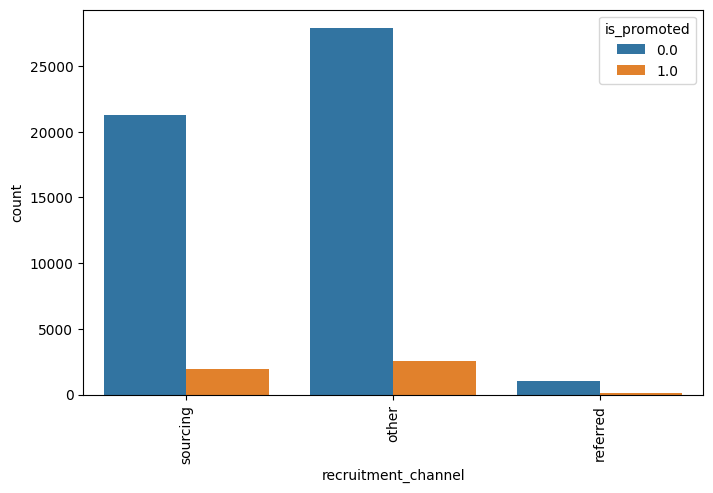

In [ ]:
# lets check categorical vs is_promoted
for features in df_1.select_dtypes(include='object').columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=features,data=df_1,hue='is_promoted')
    plt.xticks(rotation=90)
    plt.show()

# OBSERVATIONS:
1) IN SALES & MARKETING HAS MORE PROMOTIONS COMPARED TO ANOTHER DEPARTMENTS

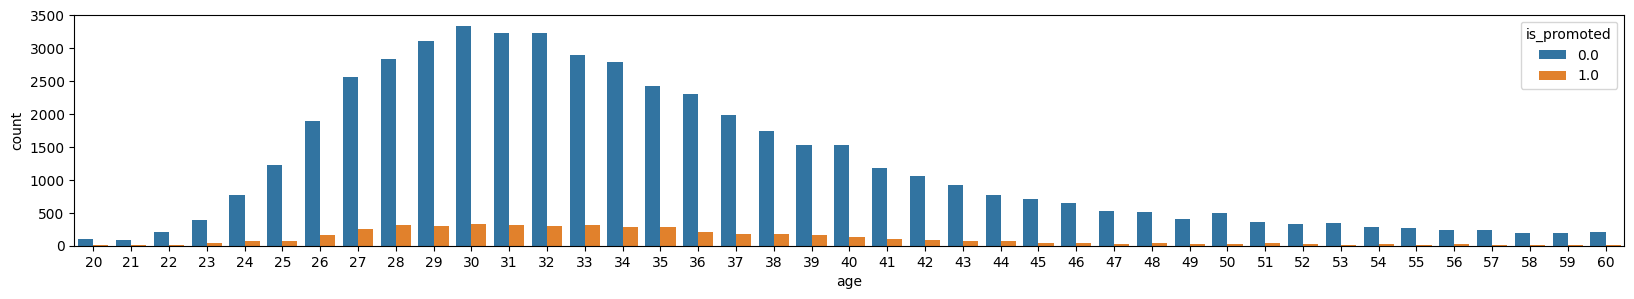

In [ ]:
# checking which age people are more promoting
plt.figure(figsize=(20,3))
sns.countplot(x='age',data=df_1,hue='is_promoted')
plt.show()

# from age 30-35 are promoting

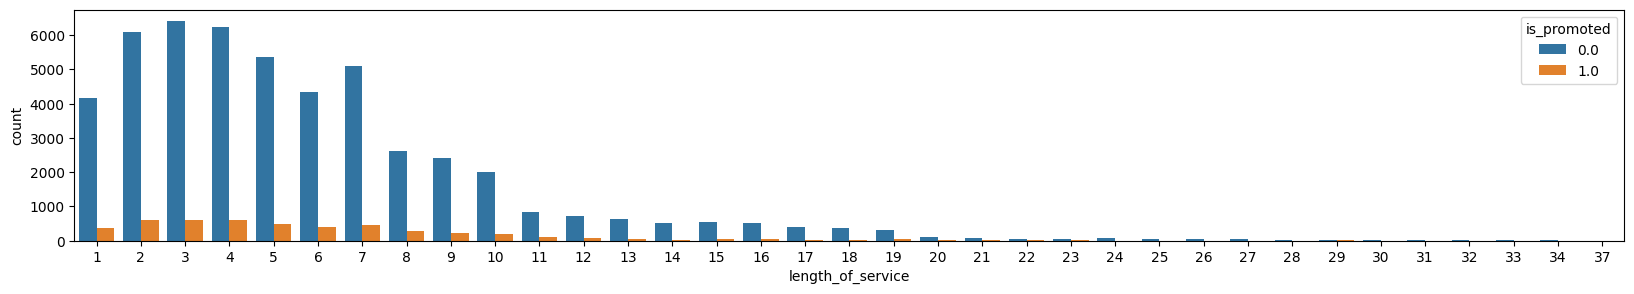

In [ ]:
# checking for length of service and promoting
plt.figure(figsize=(20,3))
sns.countplot(x='length_of_service',data=df_1,hue='is_promoted')
plt.show()

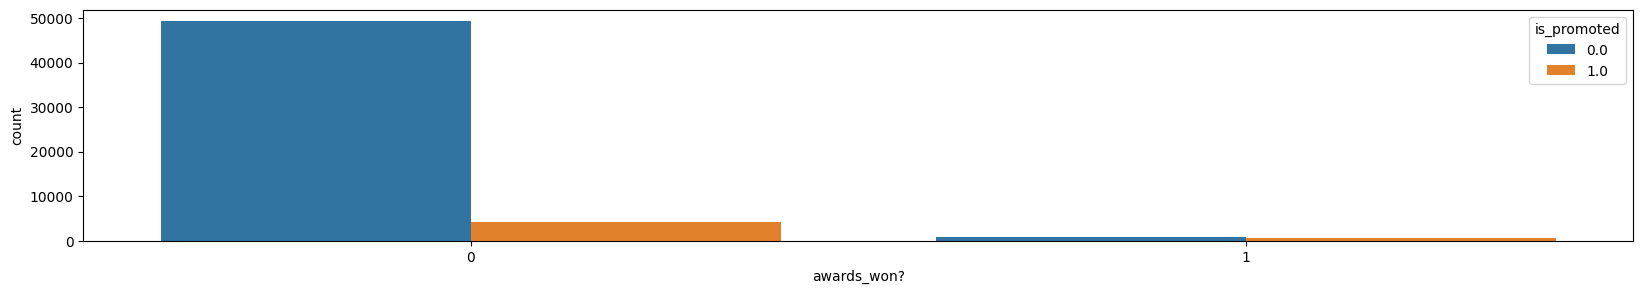

In [ ]:
# lets check for awards win and promoted column
plt.figure(figsize=(20,3))
sns.countplot(x='awards_won?',data=df_1,hue='is_promoted')
plt.show()

# observations:
1) here the persons who are not recived any award are promoted and having awards are not promoted more

2) there is no relationship b/w awards and promotion

In [ ]:
df_1.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
df_2 = df_1.copy()

In [ ]:
df_2.drop('awards_won?',axis=1,inplace=True)

In [ ]:
df_1.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
df_2.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,49,0.0
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50,0.0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,73,0.0


# preprocessing with pipeline

# import all required libraries for model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
tgt_col = ['is_promoted']
ing_col = ['employee_id']

In [ ]:
# separating categorical columns and numericsl columns
cat_col = df_2.select_dtypes(include='object').columns
num_col = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score']

In [ ]:
print(tgt_col)
print(ing_col)
print(cat_col)
print(num_col)

['is_promoted']
['employee_id']
Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'avg_training_score']


In [ ]:
# categorical preparation
cat_prep = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# numerical prepation
num_prep = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [ ]:
# column transformation
preprocessor = ColumnTransformer(transformers=[
    ('cat',cat_prep,cat_col),
    ('num',num_prep,num_col)
])


In [ ]:
# preprocessing and model building
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [ ]:
X = df_2.drop(ing_col+tgt_col,axis=1)
y = df_2[tgt_col]

In [ ]:
X.head(2)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60


In [ ]:
# separate the data as training set and testing set make train test split
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=42, test_size=0.30)

In [ ]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((54808, 10), (23490, 10), (54808, 1), (23490, 1))

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'avg_training_score'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# fit model into training data
model.fit(train_X,train_y)

ValueError: Input y contains NaN.